# Student Perfomance Analysis

## Problem
An Institution wishes to find out their student’s ability in mathematics, reading
and writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
  
  ● Gender

  ● Test preparation course
4. What do you think about the scoring variation for math, reading and writing
based on

  ● Gender
  
  ● Test preparation course
5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# reading the data into a dataframe
data = pd.read_csv("/content/StudentsPerformance.csv")

#Examining the data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1. Finding number of the male and female candidates


In [5]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

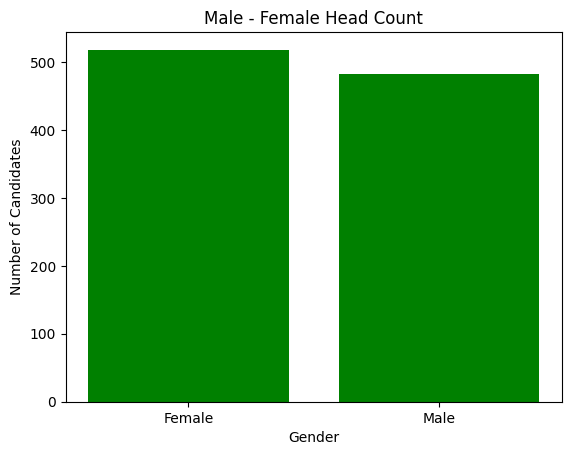

In [12]:
# Creating a plot to visualise the results
plt.bar(["Female","Male"],data.gender.value_counts(), color="g")
plt.ylabel("Number of Candidates")
plt.xlabel("Gender")
plt.title("Male - Female Head Count");

**Female = 518** &
**Male=482**

### 2. Parental level education of students

In [15]:
# Grouping the data by 'parental levl of education'
data.groupby('parental level of education').size()

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

In [17]:
sns.color_palette("coolwarm")

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

In [19]:
sns.color_palette("icefire")

[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

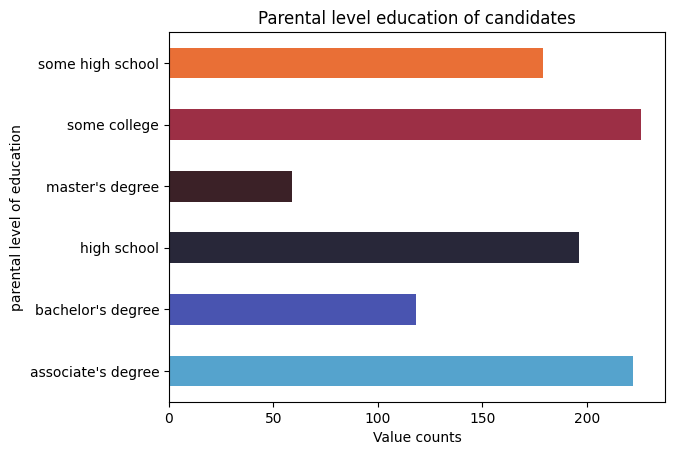

In [24]:
#visualising the results
data.groupby('parental level of education').size().plot(kind="barh", color= sns.color_palette("icefire"))
plt.xlabel("Value counts")
plt.title("Parental level education of candidates")
plt.show()

### 3. Finding who scores the most on average for math, reading and writing based on **Gender** and **Test Preparation**

In [28]:
# calculating the average of math score
math_mean = data["math score"].mean()
reading_score_mean = data["reading score"].mean()
writing_score_mean = data["writing score"].mean()

print(f"Math score mean: {math_mean}")
print(f"Reading score mean : {reading_score_mean}")
print(f"Writing score mean : {writing_score_mean}")

Math score mean: 66.001
Reading score mean : 69.195
Writing score mean : 68.119


In [37]:
# grouping the data by gender
gender_grouped_data = data.groupby("gender")

#finding the mean of grouped gender data based on "math score","reading score", "writing score"
gender_grouped_data[["math score","reading score", "writing score"]].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [40]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [44]:
# Grouped data based on Test Preparation Course
pd.DataFrame(gender_grouped_data[['test preparation course']].value_counts())

0
gender test preparation course     
female none                     334
       completed                184
male   none                     308
       completed                174

In [64]:
# Combining the above two classification into a single dataframe
combined_grouped_data = data.groupby(["gender","test preparation course"])
#finding the mean of grouped gender and test preparation course data based on "math score","reading score", "writing score"
combined_grouped_data[["math score","reading score", "writing score"]].mean()

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

### 4. Scoring varaince based on Gender, Test Preparation Course

In [55]:
#Scoring variance based on gender and test preparation course
combined_grouped_data[["math score","reading score", "writing score"]].var()

math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687

### 5. Findind the top 25% students i.e who scored more than 75% in math

In [59]:
# Finding the threshold value of math score
threshold_score = data['math score'].quantile(0.75)
print(f"Threshold math score : {threshold_score}")

Threshold math score : 77.0


In [63]:
# finding students with more than threshold math score
top_25_percent = data[data['math score'] > threshold_score]
top_25_percent

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
